## Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the train and test datasets
Detail about features:
- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploratory Data Analysis (EDA)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As we see above, those have missing values on some feature, so we have to handle it.

## Data Visualization

In [13]:
def plot_survived(param):
    g = sns.factorplot(param, "Survived", data=train, kind="bar", palette="muted", legend=True)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


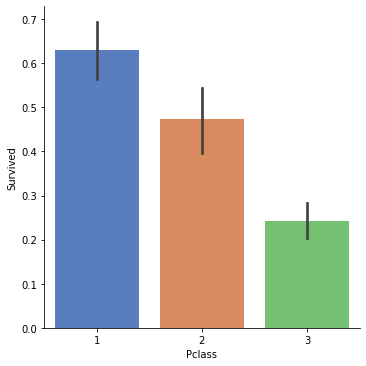

In [14]:
# Pclass
plot_survived('Pclass')

The Chart above shows that 1st class more likely survivied than other classes.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


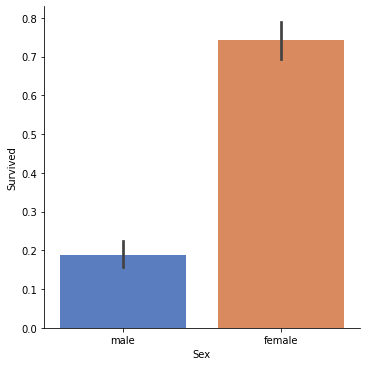

In [15]:
# Sex
plot_survived('Sex')

The Chart above shows that female more likely survivied than male.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


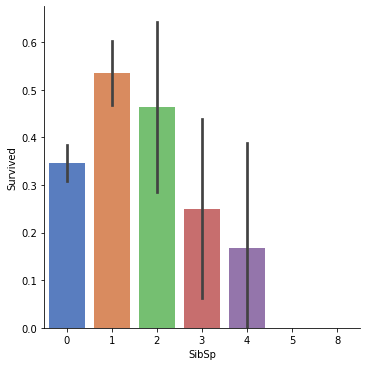

In [16]:
# SibSp
plot_survived('SibSp')

The Chart above shows a person aboarded with sibling or spouse more likely survived than person who without.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


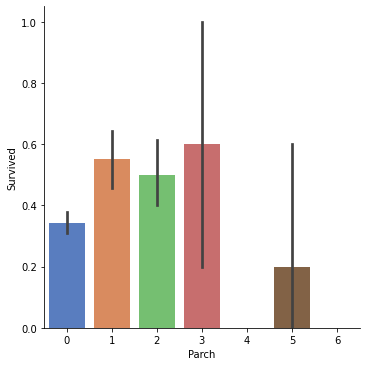

In [17]:
plot_survived('Parch')

The Chart above show a person aboarded with parent or children more likely survived than person who are alone.

## Feature Enginnering

Now, we have some missing value and we will fill out with median of each column on both train and test dataset.

In [18]:
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

Look!, we still have some missing value that can not fill by median of data because these values are non-numeric, but don’t worry because it do not have any impact on the survival status of passengers.

#### Drop features that do not have any impact on the survival status of passengers

In [21]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [22]:
# Encode Sex: 1 = male, 0 = female
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

#### We try to bin Age to 5 categorical. 
- child: 0
- young: 1
- adult: 2
- mid-age : 3
- senior: 4

In [23]:
df = pd.concat([train, test])

In [24]:
df.shape

(1309, 8)

(array([ 72.,  62., 274., 513., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

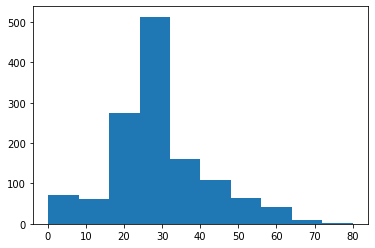

In [25]:
plt.hist(x = df['Age'], bins=10)

In [26]:
max(df['Age'])

80.0

In [27]:
min(df['Age'])

0.17

In [28]:
def bin_age(dataset):
    dataset.loc[ (dataset['Age'] <= 15), 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 25), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 35), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 4

In [29]:
bin_age(train)
bin_age(test)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,1.0,1,0,7.2500
1,2,1,1,0,3.0,1,0,71.2833
2,3,1,3,0,2.0,0,0,7.9250
3,4,1,1,0,2.0,1,0,53.1000
4,5,0,3,1,2.0,0,0,8.0500


In [31]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,2.0,0,0,7.8292
1,893,3,0,3.0,1,0,7.0000
2,894,2,1,4.0,0,0,9.6875
3,895,3,1,2.0,0,0,8.6625
4,896,3,0,1.0,1,1,12.2875


Now, our data look great and ready to fit with the model.

## K-Means model

In [32]:
X = np.array(train.drop(['Survived'], 1).astype(float)) # Features
y = np.array(train['Survived']) # Target

In [33]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300) # We want to cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(n_clusters=2)

In [34]:
# Function for evaluate accuracy of prediction
def accuracy_eval(pred):
    pred_correct = 0
    for i in range(len(X)):
        if pred[i] == y[i]:
            pred_correct += 1

    print('Accuracy is {}'.format(pred_correct/len(X)))

In [35]:
prediction = kmeans.predict(X)
accuracy_eval(prediction)

Accuracy is 0.49270482603815935


Try to change some parameter.

In [36]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=600)
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=2)

In [37]:
prediction = kmeans.predict(X)
accuracy_eval(prediction)

Accuracy is 0.49158249158249157


After we tweak some parameter of the model, we don't see anything change in the score. One of the reasons being you have not scaled the values of the different features that you are feeding to the model. The features in the dataset contain different ranges of values. So, what happens is a small change in a feature does not affect the other feature. So, it is also important to scale the values of the features to a same range.

In [38]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=600)
kmeans.fit(X_scaled)

KMeans(max_iter=600, n_clusters=2)

In [40]:
prediction = kmeans.predict(X)
accuracy_eval(prediction)

Accuracy is 0.6251402918069585


### For Test Set

In [41]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,2.0,0,0,7.8292
1,893,3,0,3.0,1,0,7.0000
2,894,2,1,4.0,0,0,9.6875
3,895,3,1,2.0,0,0,8.6625
4,896,3,0,1.0,1,1,12.2875


In [42]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(test)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=600)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [43]:
results = pd.DataFrame(data_scaled)
results['cluster'] = pred
results['cluster'].value_counts()

1    266
0    152
Name: cluster, dtype: int64

In [44]:
results.head()

,0,1,2,3,4,5,6,cluster
0,0.000000,1.0,1.0,0.50,0.000,0.000000,0.015282,1
1,0.002398,1.0,0.0,0.75,0.125,0.000000,0.013663,0
2,0.004796,0.5,1.0,1.00,0.000,0.000000,0.018909,1
3,0.007194,1.0,1.0,0.50,0.000,0.000000,0.016908,1
4,0.009592,1.0,0.0,0.25,0.125,0.111111,0.023984,0
